# Business Understanding

#### The objective here is to analyze and understand at what age do people start coding, if a persons ability to earn a high salary is related to her/his age and which country pays the highest median salary. In order to answer these questions, I have picked the stackOverFlow2020 data.

# The top 3 questions that I am going to be answering today are: 
#### Question 1 : At What age do people first start coding, and is it too late to start coding? 
#### Question 2 :  Is a persons ability to earn well correlated to her/his age?
#### Question 3 : Top 10 countries to be in order to earn a high salary

In [7]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np

## Gather

In [29]:
df = pd.read_csv(r'/Users/margaretgnana/Downloads/developer_survey_2020/survey_results_public.csv')

In [30]:
df_schema = pd.read_csv(r'/Users/margaretgnana/Downloads/developer_survey_2020/survey_results_schema.csv')

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

## Data Understanding

## Access and Explore

In [32]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [33]:
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"


In [34]:
df_schema.head(61)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


# Evaluation
## Question 1 : At What age do people first start coding, and is it too late to start coding? 

To answer the first question let's take a look at the column that we will be using to answer this : 'Age 1st Code'

In [35]:

#Lets take a look at the values that we have

Age1stCode_vals = pd.Series(df['Age1stCode'].value_counts())

Age1stCode_vals 

15                      5618
14                      5514
16                      5463
18                      5382
12                      5081
13                      4187
17                      3973
10                      3424
19                      3120
20                      2453
11                      2358
8                       1624
9                       1231
21                      1221
22                       999
7                        978
23                       710
25                       636
24                       577
6                        566
Younger than 5 years     414
5                        368
26                       342
27                       264
28                       246
30                       235
29                       170
32                       107
31                        89
35                        86
33                        82
34                        49
40                        39
37                        33
38            

## Clean

In [36]:
#Looks like we have "Yonger than 5 years" and "Older than 85" which is of type string , 
#hence mapping them to 4 and 86 respectively for consistency

df['Age1stCode'].replace({"Younger than 5 years": 4, "Older than 85": 86}, inplace=True)

## Analyze 

In [37]:
#Taking a look at the values after replacement
Age1stCode_vals_afterReplacement = pd.Series(df['Age1stCode'].value_counts())

Age1stCode_vals_afterReplacement 

15    5618
14    5514
16    5463
18    5382
12    5081
13    4187
17    3973
10    3424
19    3120
20    2453
11    2358
8     1624
9     1231
21    1221
22     999
7      978
23     710
25     636
24     577
6      566
4      414
5      368
26     342
27     264
28     246
30     235
29     170
32     107
31      89
35      86
33      82
34      49
40      39
37      33
38      32
36      30
39      28
45      20
50      18
42      16
86      13
44      13
43      11
41      10
47       8
49       8
54       7
46       6
55       6
48       6
53       4
85       4
51       4
52       3
58       3
64       2
56       2
73       2
83       1
76       1
63       1
68       1
72       1
Name: Age1stCode, dtype: int64

## Model

In [48]:
#Checking to see if the column has been type casted to a float type
df['Age1stCode'].dtype

dtype('float64')

In [45]:
#In order to plot a histogram , I am casting the integer value to float by using the function astype()
df['Age1stCode'] = df['Age1stCode'].astype(float, errors = 'raise')

## Visualize

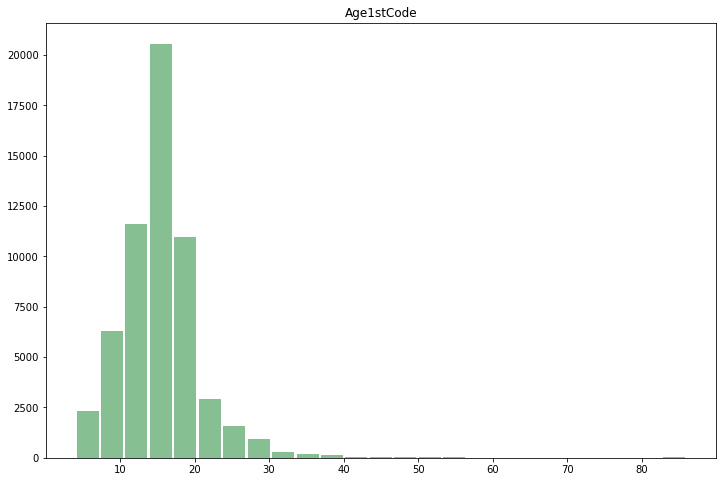

In [130]:
#Plotting a histogram here using .hist() function

ax = df.hist(column='Age1stCode', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


## Brief explanation for visualisation of Question 1

### In conclusion, we can say that according to the survey, most of the individuals started to code under the age of 30, with it's peak at around 17-18 years of age. Also, it's never to late to start coding - as we an see we have individuals who have first started to code above the age of 40 and going up to beyond 86 years of age (which we can see is an outlier)


# Question 2 :  Is a persons ability to earn well correlated to her/his age?

## Model 

In [124]:
# In order to plot the heatmap, let's put the columns that we need in another dataframe called data2
data2 = df[['Age', 'ConvertedComp']]

## Visualize 

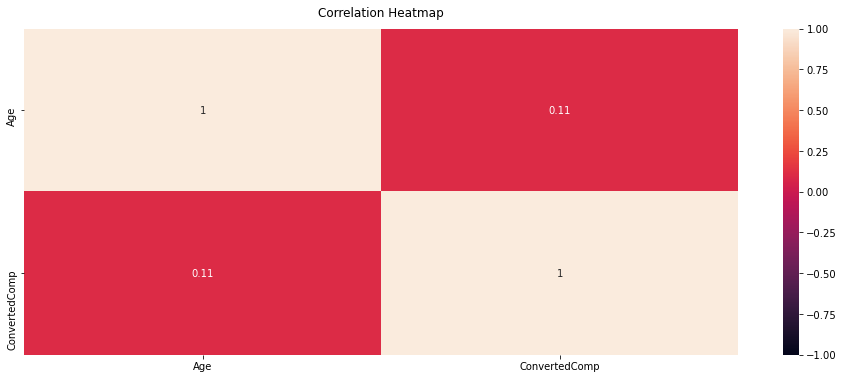

In [125]:
#Plotting the Heatmap that shows us the correlation values as well

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Brief explanation for visualisation of Question 2

### According to the heatmap above that we generated, we can say that there is a very less correlation between Age of an individual and her/his ability to earn well

# Question 3 : Top 10 countries to be in order to earn a high salary

## Model

In [129]:
#Grouping by Country and Median Salary
#Removing missing values since , even if we impute the nan's with '0', then if want to take a look at 
#the bottom 10 countries earning the least, the data will be incorrect

country_comp = df.groupby(['Country'])['ConvertedComp'].median().sort_values(ascending = False).dropna().head(10)

In [123]:
country_comp

Country
United States    115000.0
Switzerland       98599.0
Israel            98064.0
Nomadic           93000.0
Andorra           88640.0
Bahamas           86706.0
Denmark           81624.0
Norway            80922.0
Iceland           80424.0
Australia         76831.0
Name: ConvertedComp, dtype: float64

## Visualize

<AxesSubplot:title={'center':'Top 10 Countries to be in to earn the highest salary'}, xlabel='Salary', ylabel='Country'>

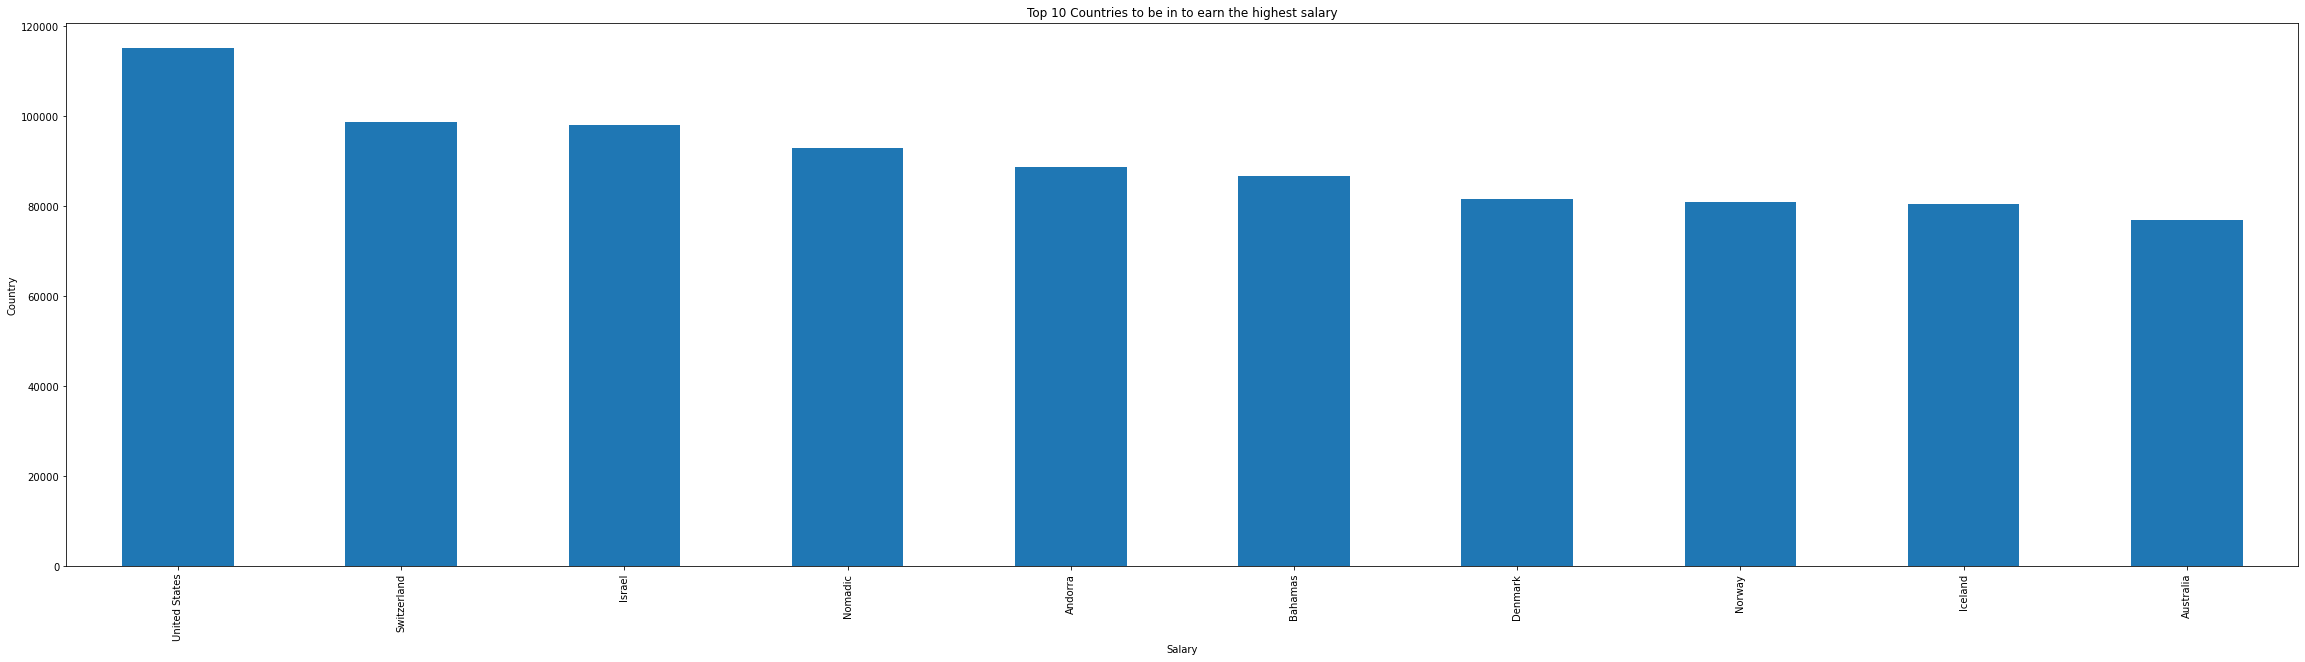

In [122]:
country_comp.plot(kind='bar', title='Top 10 Countries to be in to earn the highest salary', ylabel='Country',
         xlabel='Salary', figsize=(40, 10))

## Brief explanation for visualisation of Question 3

### We can see above that the top 10 countries to be in order to earn a high salary (median) is United States , Switzerland, Israel, Nomadic, Andorra, Bahamas, Denmark, Norway, Iceland and Australia